In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [3]:
# Q1 
# The probability to get 2 ones is 1/6 * 1/6 = 1/36
# There are 6 cases of getting sum = 7 : 1+6 ; 2+5 ; 3+4 as well as their symmetrical counterparts
# So the probability of getting sum of 7 is 6/36 = 1/6
# The ratio of probabilities is 1/6

In [4]:
#Using np.convolve function to measure the probabilities of sum of 2 dices:
# The probabilities of rolling dice 1 and 2 are :
A = np.array([1/6,1/6,1/6,1/6,1/6,1/6])
B = np.array([1/6,1/6,1/6,1/6,1/6,1/6])
C = np.convolve(A,B,'full')

In [5]:
x = np.linspace(2,11+1,11)
x

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

Text(0, 0.5, 'convoluted probability')

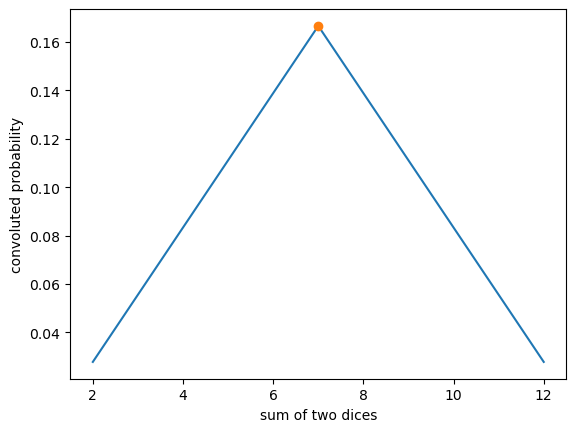

In [6]:
fig,ax = plt.subplots()
ax.plot(x,C)
ax.plot(7,C[5],marker="o")
ax.set_xlabel("sum of two dices")
ax.set_ylabel("convoluted probability")

In [7]:
# Question 3
# The mean value : 
mean_val = np.mean(C)
print(mean_val)
# The variance of distribution is : 
variance = np.var(C)
variance

0.09090909090909091


0.0019768390980512197

In [8]:
# Question 4

In [9]:
def convolv(A,old,count):
    if(count == 1):
        return old
    else:
        temp = np.convolve(A,old)
        return convolv(A,temp,count-1)

In [10]:
len(convolv(A,A,10))

51

In [11]:
z = np.linspace(10,len(convolv(A,A,10))+10-1,len(convolv(A,A,10)))

In [12]:
convolv(A,A,10)

array([1.65381717e-08, 1.65381717e-07, 9.09599443e-07, 3.63839777e-06,
       1.18247928e-05, 3.31094197e-05, 8.26081676e-05, 1.87542867e-04,
       3.92946959e-04, 7.67701930e-04, 1.40951530e-03, 2.44665712e-03,
       4.03407353e-03, 6.34189270e-03, 9.53533096e-03, 1.37465945e-02,
       1.90415547e-02, 2.53867551e-02, 3.26236936e-02, 4.04573294e-02,
       4.84643679e-02, 5.61241048e-02, 6.28704385e-02, 6.81581055e-02,
       7.15327194e-02, 7.26928060e-02, 7.15327194e-02, 6.81581055e-02,
       6.28704385e-02, 5.61241048e-02, 4.84643679e-02, 4.04573294e-02,
       3.26236936e-02, 2.53867551e-02, 1.90415547e-02, 1.37465945e-02,
       9.53533096e-03, 6.34189270e-03, 4.03407353e-03, 2.44665712e-03,
       1.40951530e-03, 7.67701930e-04, 3.92946959e-04, 1.87542867e-04,
       8.26081676e-05, 3.31094197e-05, 1.18247928e-05, 3.63839777e-06,
       9.09599443e-07, 1.65381717e-07, 1.65381717e-08])

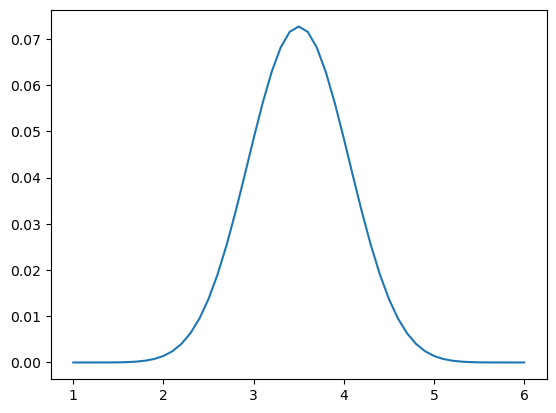

In [13]:
fig3,ax3 = plt.subplots()
ax3.plot(z/10,convolv(A,A,10))
# This looks like a Gaussian distribution, but we cann't quarantee that;
# To make more investigation, we plot the y into log scale

Text(0, 0.5, 'log')

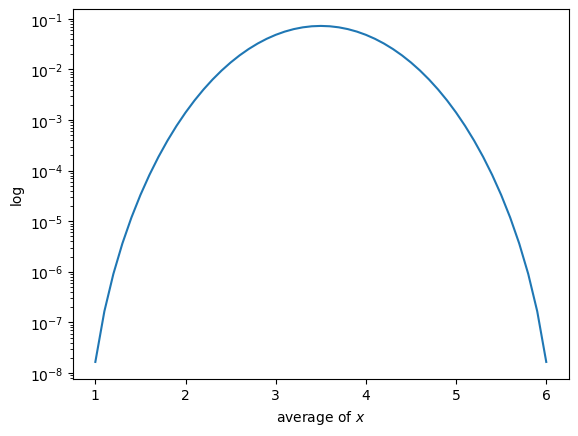

In [14]:
fig4,ax4 = plt.subplots()
plt.yscale("log")
ax4.plot(z/10,convolv(A,A,10))
ax4.set_xlabel("average of $x$")
ax4.set_ylabel("log")
# This looks like a perfect parabola, we can assume that the convoluted distrubution of the average of 10 dice is Gaussian 

In [15]:
#Question 5
x = np.linspace(stats.norm.ppf(0.01),stats.norm.ppf(0.99), 1000)
pdf = scipy.stats.norm.pdf(x)

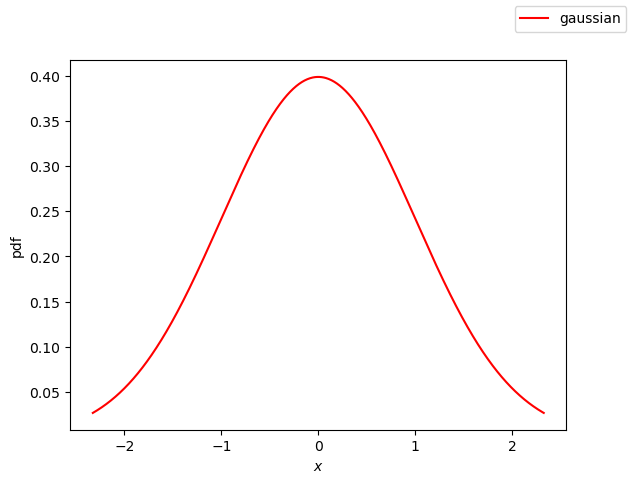

In [16]:
fig5,ax5 = plt.subplots()
ax5.plot(x,pdf,"r",label="gaussian")
ax5.set_xlabel("$x$")
ax5.set_ylabel("pdf")
fig5.legend()

In [29]:
x = np.linspace(stats.norm.ppf(0.01),stats.norm.ppf(0.99), 9991)
new_pdf = convolv(pdf,pdf,10)

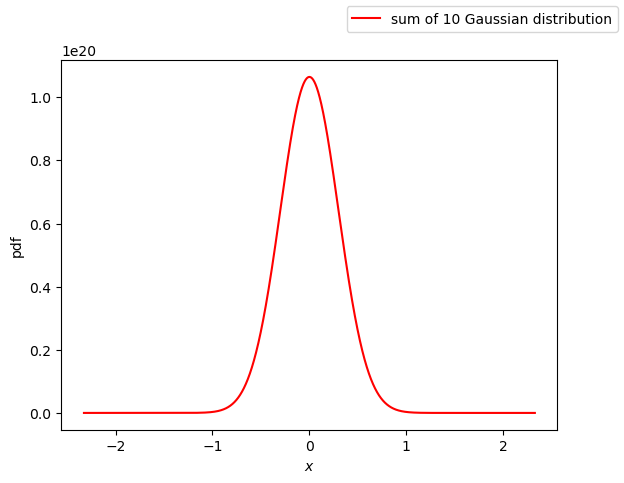

In [30]:
fig6,ax6 =  plt.subplots(1,1)
ax6.plot(x,new_pdf,"r",label = "sum of 10 Gaussian distribution")
ax6.set_xlabel("$x$")
ax6.set_ylabel("pdf")
fig6.legend()

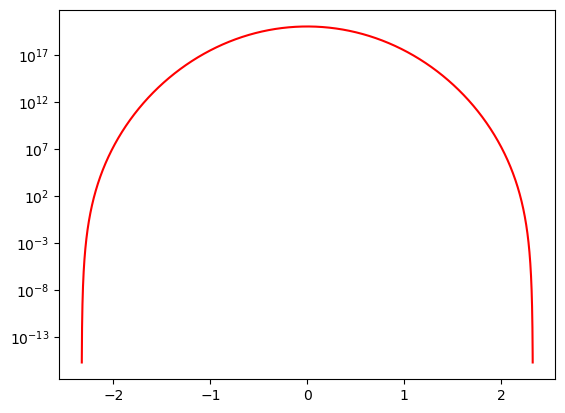

In [35]:
fig7,ax7 =  plt.subplots()
plt.yscale("log")
ax7.plot(x,new_pdf,"r")

In [32]:
# From the plots above, we can see that no matter how many times we sum or average to a initially Gaussian distribution, 
# the resulting distribution is still Gaussian. 

In [34]:
# The standard deviation of new pdf ( sum of 10 pdf) is :
print("sum of 10 dice has standard deviation of " + str(np.std(new_pdf)))

sum of 10 dice has standard deviation of 3.157004541934564e+19


In [22]:
# So we can see that as we sum up these pdf, our standard deviation also increase

average of 10 dice has standard deviation of 3.157004541934564e+19


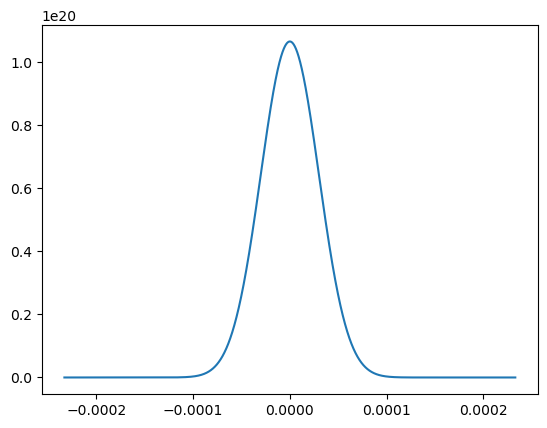

In [38]:
# we can also find how does standard deviation change after average the sum:
fig8,ax8 = plt.subplots()
ax8.plot(x/len(x),new_pdf)

In [39]:
print("average of 10 dice has standard deviation of " + str(np.std(new_pdf)))

average of 10 dice has standard deviation of 3.157004541934564e+19


In [40]:
# Thus, averaging the x axis does not change the standard deviation 